In [6]:
import pandas as pd

In [4]:
import json
import os

In [7]:
datum = {}
for fi in os.listdir('../sample'):
    try:
        path = f'../sample/{fi}'
        jsonObj = pd.read_json(path_or_buf=f'../sample/{fi}', lines=True)
        datum[fi.split(".")[0]] = jsonObj
    except Exception as e:
        print(fi, e)
    


datum['fr_FR'].columns



Index(['id', 'source_locale', 'target_locale', 'source', 'target', 'metadata'], dtype='object')

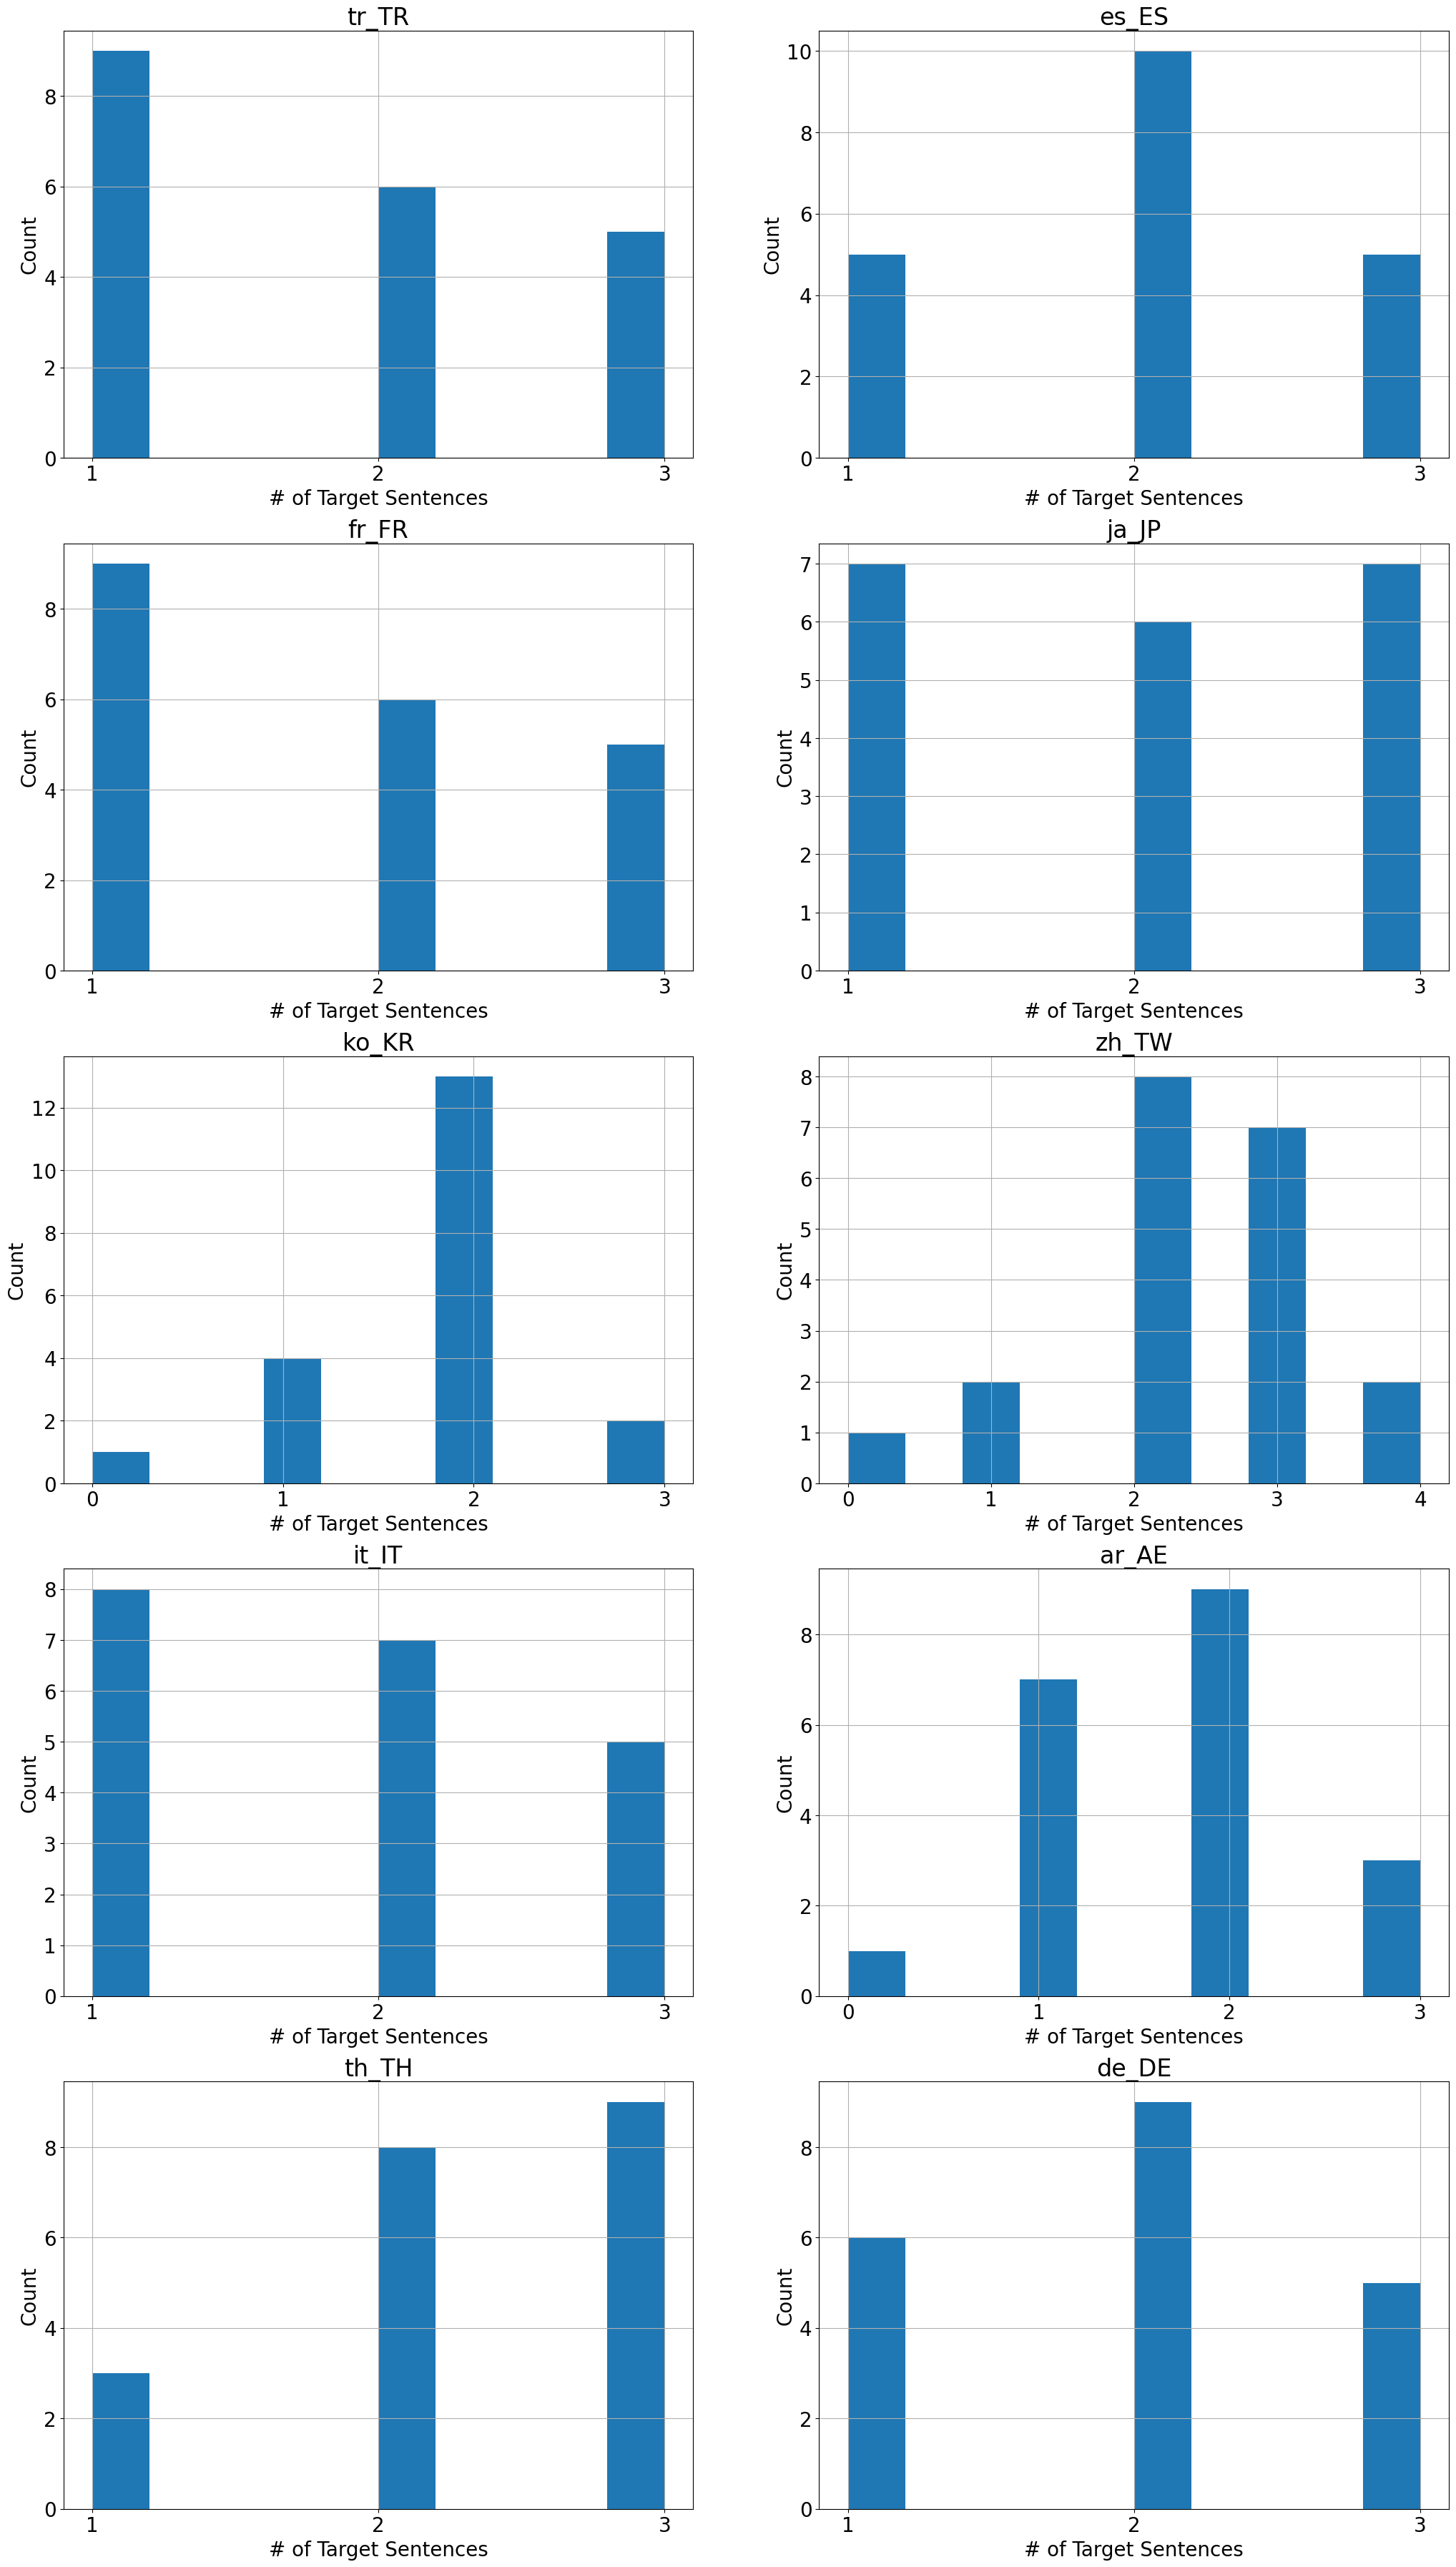

In [8]:
import matplotlib.pyplot as plt

'''
    
'''

for name, df in datum.items():
    df['t_count'] = df['target'].apply(lambda x: len(x))

fig, axes = plt.subplots(5, 2, figsize=(25, 45))  # Adjust layout as needed

for i, value in enumerate(datum.items()):
    x, y = divmod(i, 2)
    name, df = value
    ax = axes[x][y]
    ax.set_title(name, fontdict={'fontsize': 24})
    ax.set_xticks([0, 1, 2, 3, 4]) 
    ax.tick_params(labelsize='20')
    ax.set_xlabel("# of Target Sentences", fontdict={'fontsize': 20})
    ax.set_ylabel("Count", fontdict={'fontsize': 20})
    

    df['t_count'].hist(ax=ax, bins=10)

plt.show()
    

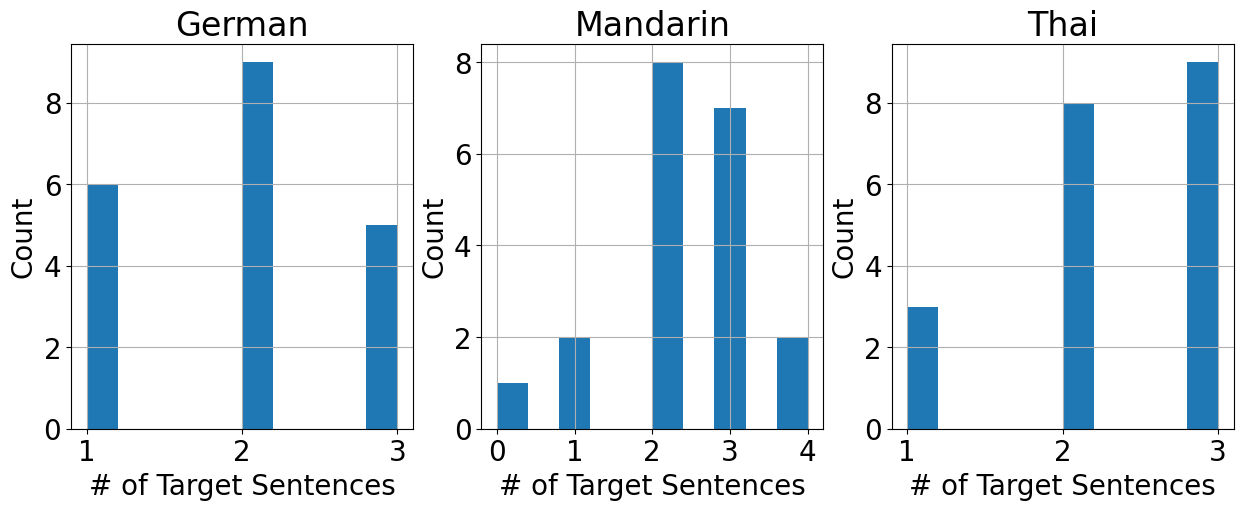

In [18]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust layout as needed


c = 0
for i, item in enumerate([('de_DE', 'German'), ('zh_TW', 'Mandarin'), ('th_TH', 'Thai')]):
    value, name = item
    df = datum[value]
    ax = axes[i]
    ax.set_title(name, fontdict={'fontsize': 24})
    ax.set_xticks([0, 1, 2, 3, 4]) 
    ax.tick_params(labelsize='20')
    ax.set_xlabel("# of Target Sentences", fontdict={'fontsize': 20})
    ax.set_ylabel("Count", fontdict={'fontsize': 20})
    

    df['t_count'].hist(ax=ax, bins=10)

        

plt.show()



In [14]:
#Model supported translations
with open('../data/raw_translations.txt', 'r') as f:
    l = f.read()

translations = {}
reverse_translations = {}
for tr in l.split(","):
    tr = tr.strip()
    tr = tr.replace("(", "")
    tr = tr.replace(")", "")
    tr = tr.split(" ")
    translations[tr[0]] = tr[1]
    reverse_translations[tr[1]] = tr[0]

import json
with open('../data/trans_table.json', 'w') as f:
    f.write(json.dumps({"lookup": translations, "reverse": reverse_translations}, indent=1))
    

In [4]:
import os
import pandas as pd

In [3]:
os.listdir('../data/train')

['ja', 'it', 'ar', 'de', 'fr', 'es']

In [7]:
lang_dfs = {}
for lang in os.listdir('../data/train'):
    jsonObj = pd.read_json(path_or_buf=f'../data/train/{lang}/train.jsonl', lines=True)
    lang_dfs[lang] = jsonObj


    

In [9]:
from collections import Counter
main_counter = Counter()
lang_counters = {}
target_counts = {}
for lang, df in lang_dfs.items():
    lang_count = Counter()
    df['source'].apply(lambda x: main_counter.update(x.split(" ")))
    df['source'].apply(lambda x: lang_count.update(x.split(" ")))
    lang_counters[lang] = lang_count




In [31]:
counts = [ (l, len(c.most_common()), len(lang_dfs[l]), len(c.most_common())/len(lang_dfs[l])) for l, c in lang_counters.items()]
counts

[('ja', 8934, 7225, 1.2365397923875432),
 ('it', 5794, 3739, 1.5496121957742712),
 ('ar', 8568, 7220, 1.1867036011080332),
 ('de', 5942, 4087, 1.4538781502324443),
 ('fr', 7076, 5531, 1.2793346591936359),
 ('es', 6598, 5160, 1.2786821705426357)]

In [61]:
import math 
l = []
for lang, df in lang_dfs.items():
    c = Counter()
    df['ent_count'] = df['entities'].apply(lambda x: len(x))
    c.update(df['ent_count'])

    l.append((lang, c.most_common() ))

l

ent_counts = {}
labels = []
#iterating over l (langauge, most_common())
for lang, common in l:
    #getting the  entity count, and the amount of times we see that count 
    labels.append(lang)
    for ent_count, count in common:
        try:
            ent_counts[ent_count].append(math.log(count+1))
        except:
            ent_counts[ent_count] = [math.log(count+1)]
        # build a table for the bar chart?

ent_counts

for k,v in ent_counts.items():
    if len(v) < 6:
        for i in range(6-len(v)):
            ent_counts[k].append(0)

ent_counts

{1: [8.538367426647644,
  8.109224953089955,
  8.592300663903043,
  8.170751423757535,
  8.475120414994329,
  8.420902531097951],
 2: [7.570443252057374,
  5.981414211254481,
  7.431299675155903,
  6.244166900663736,
  6.532334292222349,
  6.3561076606958915],
 3: [5.135798437050262,
  2.9444389791664403,
  4.927253685157205,
  3.58351893845611,
  3.912023005428146,
  3.7376696182833684],
 4: [2.302585092994046,
  1.0986122886681098,
  1.791759469228055,
  1.0986122886681098,
  1.3862943611198906,
  1.3862943611198906],
 5: [0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0, 0, 0],
 6: [0.6931471805599453, 0.6931471805599453, 0.6931471805599453, 0, 0, 0]}

In [58]:
import matplotlib.pyplot as plt
import numpy as np

Rectangle(xy=(0.075, 0), width=0.15, height=8.53837, angle=0)
Rectangle(xy=(1.075, 0), width=0.15, height=8.10922, angle=0)
Rectangle(xy=(2.075, 0), width=0.15, height=8.5923, angle=0)
Rectangle(xy=(3.075, 0), width=0.15, height=8.17075, angle=0)
Rectangle(xy=(4.075, 0), width=0.15, height=8.47512, angle=0)
Rectangle(xy=(5.075, 0), width=0.15, height=8.4209, angle=0)
Rectangle(xy=(0.225, 0), width=0.15, height=7.57044, angle=0)
Rectangle(xy=(1.225, 0), width=0.15, height=5.98141, angle=0)
Rectangle(xy=(2.225, 0), width=0.15, height=7.4313, angle=0)
Rectangle(xy=(3.225, 0), width=0.15, height=6.24417, angle=0)
Rectangle(xy=(4.225, 0), width=0.15, height=6.53233, angle=0)
Rectangle(xy=(5.225, 0), width=0.15, height=6.35611, angle=0)
Rectangle(xy=(0.375, 0), width=0.15, height=5.1358, angle=0)
Rectangle(xy=(1.375, 0), width=0.15, height=2.94444, angle=0)
Rectangle(xy=(2.375, 0), width=0.15, height=4.92725, angle=0)
Rectangle(xy=(3.375, 0), width=0.15, height=3.58352, angle=0)
Rectangle(xy

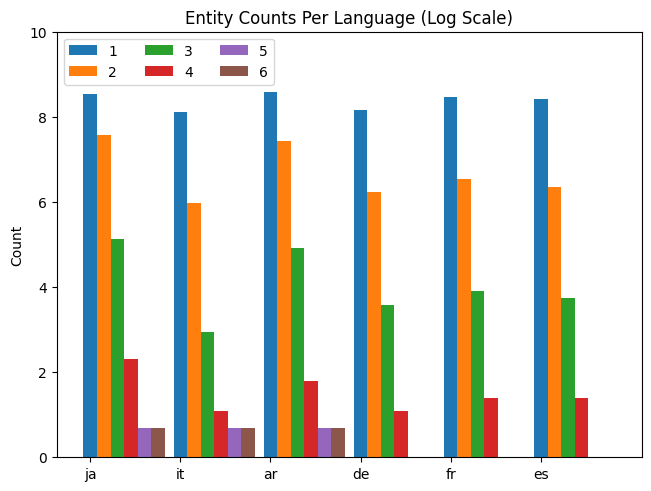

In [ ]:

fig, ax =  plt.subplots(layout='constrained')
x = np.arange(len(labels)) 
width = 0.15
multiplier = 1
for attribute, measurement in ent_counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    
    multiplier += 1

ax.set_ylabel('Count')
ax.set_title('Entity Counts Per Language (Log Scale)')
ax.set_xticks(x + width, labels)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 10)

plt.savefig('../media/logScaleEntCount.png', bbox_inches='tight')